<a href="https://colab.research.google.com/github/BREIMER606/Programaci-n-Cient-fica/blob/main/Lab1_Pct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCIENTIFIC COMPUTING – Lab_1

Breimer Meneses

# Context


Indoor localization is a fundamental challenge for applications in industrial, logistics, and autonomous navigation fields due to the limitations of conventional satellite technologies like GPS that have low precision in enclosed environments or with dense obstacles [1]. Ultra Wideband (UWB)-based systems have emerged as a promising solution thanks to their high temporal resolution and ability to mitigate multipath effects, offering precise position estimates at relatively low costs [2]. However, the presence of Non-Line-of-Sight (NLOS) conditions and reflections cause significant biases and errors in distance measurements, degrading the reliability of localization systems [3]. Figure 1 illustrates the spatial trajectory of a drone obtained from our experimental setup using a UWB-based localization system, highlighting complex movement patterns and environmental influences captured in the dataset. To overcome these challenges, sensor data fusion techniques are used to integrate complementary measurements from inertial sensors, UWB, and odometry, improving accuracy and robustness by leveraging the advantages of each modality. Moreover, machine learning algorithms are increasingly applied to model complex propagation phenomena and residual errors that traditional methods cannot fully capture, enabling adaptive, data-driven corrections that enhance localization performance in dynamic and congested indoor environments [4] [5].

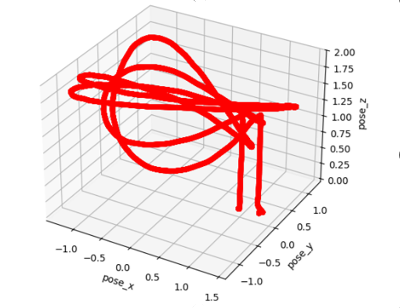

*Figure 1. 3D trajectory recorded by the drone on the (x, γ, z) axes. Source: Own elaboration, based on the file const1-trial2-tdoa2.csv*



# Database description

The recorded dataset includes synchronized measurements of the drone's three-dimensional pose coordinates (unknown ,x, y, z) along with inertial sensor data, such as accelerations and angular velocities, as well as environmental parameters like barometric pressure. These multi-modal data streams allow for comprehensive modeling and analysis of the drone's motion dynamics, as well as of the UWB signal propagation characteristics under real indoor conditions.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [ ]:
# Import data set
df = pd.read_csv('const1-trial2-tdoa2.csv')

In [ ]:

# Mostrar información básica
print("Dimensiones del dataset:", df.shape)
print(df.head())

# Graficar una columna de ejemplo (ajustar según nombres reales de columnas)
plt.figure(figsize=(10,4))
df.iloc[:,1].plot(title="Ejemplo de señal TDOA")
plt.xlabel("Muestras")
plt.ylabel("Valor")
plt.show()


In [ ]:
# ===============================================================
# 3. POO para el procesamiento de datos
# ===============================================================

class SignalProcessor:
    def __init__(self, data):
        self.data = data

    def normalize(self):
        """Normaliza la señal con media 0 y varianza 1"""
        return (self.data - self.data.mean()) / self.data.std()

    def moving_average(self, window=5):
        """Aplica promedio móvil"""
        return self.data.rolling(window).mean()

# Ejemplo de uso con la segunda columna del dataset
signal = SignalProcessor(df.iloc[:,1])

normalized = signal.normalize()
smoothed = signal.moving_average(20)

plt.figure(figsize=(10,4))
plt.plot(df.iloc[:,1], label="Original")
plt.plot(normalized, label="Normalizada")
plt.plot(smoothed, label="Suavizada (20)")
plt.legend()
plt.title("Procesamiento de señal con POO")
plt.show()


In [ ]:
# ===============================================================
# 4. Derivación e integración numérica
# ===============================================================

col = df.iloc[:,1].values  # segunda columna como ejemplo

# Derivada numérica
derivative = np.gradient(col)

# Integración (área bajo la curva)
area = integrate.simpson(col)

plt.figure(figsize=(10,4))
plt.plot(col, label="Señal original")
plt.plot(derivative, label="Derivada")
plt.legend()
plt.title("Derivada numérica de la señal")
plt.show()

print("Área bajo la curva (integración Simpson):", area)


In [ ]:
# ===============================================================
# 5. Operaciones matriciales
# ===============================================================

# Seleccionar primeras 4 columnas numéricas (ajusta según dataset)
mat = df.iloc[:,1:5].values

# Multiplicación de matrices
mat_mult = mat.T @ mat

# Eigenvalores y eigenvectores
eigvals, eigvecs = np.linalg.eig(mat_mult)

print("Valores propios:", eigvals)

# Graficar valores propios
plt.figure(figsize=(6,4))
plt.bar(range(len(eigvals)), eigvals)
plt.title("Valores propios de la matriz")
plt.show()


In [ ]:

# 6. Discusión y conclusiones


# conclusiones
# - La normalización y el promedio móvil permiten limpiar el ruido.
# - La derivada muestra las variaciones rápidas en la señal.
# - El área bajo la curva representa una medida de energía acumulada.
# - Los valores propios de la matriz nos muestran la contribución
#   de cada componente en la variabilidad de los datos.


# References

[1] F. Zafari et al., "A Survey of Indoor Localization Systems and Technologies," IEEE Communications Surveys & Tutorials, 2019.

[2] V. Barral et al., "NLOS Classification Based on RSS and Ranging Statistics Obtained from Low-Cost UWB Devices," 2019.

[3]I. Güvenç et al., "NLOS Identification and Weighted Least Squares Localization for UWB Systems," EURASIP Journal on Advances in Signal Processing, 2008.

[4] J. Khodjaev et al., "Survey of NLOS Identification and Error Mitigation Problems in UWB Positioning Algorithms," Annals of Telecommunications, 2010.

[5] H. Wymeersch et al., "A Machine Learning Approach to Ranging Error Mitigation for UWB Localization," IEEE Transactions on Communications, 2012.